In [ ]:
# Insert project token here

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - BanCoppel

<hr>

## Instalando Librerias

In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
!pip install xgboost --upgrade

In [ ]:
!pip install imblearn --upgrade

In [ ]:
!pip install lightgbm --upgrade

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<hr>

## Descargar los conjuntos de datos en formato .csv

In [44]:
import pandas as pd
import numpy as np

In [45]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/training_dataset.csv
df_training_dataset = pd.read_csv(r'training_dataset.csv')
df_training_dataset.tail()

--2020-09-17 07:21:56--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/training_dataset.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘training_dataset.csv.1’

training_dataset.cs     [ <=>                ]   2.22M  --.-KB/s    in 0.08s   

2020-09-17 07:21:56 (26.8 MB/s) - ‘training_dataset.csv.1’ saved [2327419]



,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
23994,160,F,40.0,Soltero,Profesor,Sector privado,Iphone 6+,10.0,3.0,Si,31.0,0.0,0.0,0.0,31.0,Perfil_3
23995,155,F,24.0,NaN,Profesor,Institucion publica,L G,15.0,6.0,Si,30.0,30.0,31.0,30.0,7.0,Perfil_0
23996,229,F,24.0,Casado,Profesor,Desempleados,LG V10,5.0,3.0,Si,0.0,30.0,1.0,0.0,0.0,Perfil_4
23997,214,F,24.0,Soltero,Desempleados,Desempleados,Android,5.0,6.0,No,7.0,0.0,1.0,1.0,0.0,Perfil_4
23998,30,M,30.0,Casado,Servidor publico,Institucion publica,0,5.0,4.0,No,31.0,31.0,0.0,0.0,0.0,Perfil_3


In [4]:
df_training_dataset.describe()

,ID,Años,Anos_usando_internet_banking,Anos_usando_banca_movil,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes
count,23999.000000,23731.000000,23355.000000,22698.000000,21275.000000,22728.000000,23714.000000,23524.000000,23429.000000
mean,124.898996,34.495681,6.078484,3.624901,17.291704,17.402719,6.631399,3.157116,10.532204
std,72.305331,7.922939,3.470493,1.939364,17.207016,18.025357,10.835846,6.903053,12.299772
min,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,30.000000,5.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,125.000000,30.000000,5.000000,3.000000,7.000000,7.000000,1.000000,0.000000,4.000000
75%,188.000000,40.000000,10.000000,6.000000,31.000000,31.000000,15.000000,1.000000,15.000000
max,250.000000,50.000000,15.000000,7.000000,50.000000,50.000000,31.000000,31.000000,35.000000


Sobre el archivo "training_dataset.csv", temos alguna información sobre los usuarios de la app de BanCoppel:

**ID**

**Genero**

**Idade**

**Estado_civil**

**Trabajo**

**Sector**

**Telefono**

**Anos_usando_internet_banking**

**Anos_usando_banca_movil**

**Banca_movil_userfriendly**

**Frecuencia_internet_banking_mes**

**Frecuencia_banca_movil_mes**

**Frecuencia_pagamentos_tarjeta_mes**

**Frecuencia_tarjeta_virtual_mes**

**Frecuencia_saldo_cuenta_mes**

**TARGET**

In [ ]:
df_training_dataset.info()

In [ ]:
df_training_dataset.nunique()

In [ ]:
df_training_dataset['TARGET'].value_counts()

<hr>

## Desglose del desafío: clasificación multiclase

Este es un desafio cuyo objetivo de negocio es la segmentación de usuario de aplicativos de BanCopp. Podemos utilizar  dos enfoques: Machine Learning supervisado (clasificación) o no supervisado (clustering). En este desafío será usado la clasificación porque el conjunto de datos ya está disponible con "labels", o en otras palabras, ya con la variable objetivo. 

En la biblioteca scikit-learn tenemos diversos algoritmos para clasificación. El participante es libre para utilizar el framework que desee para completar este desafío.

En este notebook será mostrado un ejemplo usando el algoritmo "Decision Tree" para clasificar los estudantes en seis diferentes perfiles.

# ¡Atención!

La columna objetivo de este desafío es la columna ``TARGET``

<hr>

## Pre-procesando el dataset antes del entrenamiento

### Removiendo todas las lineas que poseen algun valor nulo en determinadas columnas

Usando el método Pandas **DataFrame.dropna()** usted puede remover todas las lineas nulas del dataset.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [5]:
# Mostrando los datos nulos del dataset antes de la primera transformación (df)
print("Valores nulos del df_training_dataset antes de la transformación DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de la transformación DropNA: 

ID                                      0
Genero                                889
Años                                  268
Estado_civil                          704
Trabajo                              2955
Sector                                359
Telefono                             1421
Anos_usando_internet_banking          644
Anos_usando_banca_movil              1301
Banca_movil_userfriendly                0
Frecuencia_internet_banking_mes      2724
Frecuencia_banca_movil_mes           1271
Frecuencia_pagamentos_tarjeta_mes     285
Frecuencia_tarjeta_virtual_mes        475
Frecuencia_saldo_cuenta_mes           570
TARGET                                  0
dtype: int64



In [6]:
missing_values=df_training_dataset.isnull().sum(axis = 0)
total_cells = np.product(df_training_dataset.shape[0])
missing_values/total_cells*100

ID                                    0.000000
Genero                                3.704321
Años                                  1.116713
Estado_civil                          2.933456
Trabajo                              12.313013
Sector                                1.495896
Telefono                              5.921080
Anos_usando_internet_banking          2.683445
Anos_usando_banca_movil               5.421059
Banca_movil_userfriendly              0.000000
Frecuencia_internet_banking_mes      11.350473
Frecuencia_banca_movil_mes            5.296054
Frecuencia_pagamentos_tarjeta_mes     1.187549
Frecuencia_tarjeta_virtual_mes        1.979249
Frecuencia_saldo_cuenta_mes           2.375099
TARGET                                0.000000
dtype: float64

In [7]:
# Aplicando la función para borrar todas las lines con valore NaN en las siguientes columnas:
#df_training_dataset = df_training_dataset.dropna(axis='index', how='any', subset=['Genero','Estado_civil', 'Sector'])

In [8]:
df_training_dataset.shape[0]

23999

In [9]:
df_training_dataset['Genero'].value_counts()

M    12988
F    10030
0       92
Name: Genero, dtype: int64

In [10]:
#df_training_dataset = df_training_dataset.drop(df_training_dataset[df_training_dataset['Genero']=='0'].index).reset_index(drop=True)

In [11]:
df_training_dataset['Genero'].value_counts()

M    12988
F    10030
0       92
Name: Genero, dtype: int64

In [12]:
df_training_dataset['Trabajo'].value_counts()

Profesor                           3534
Servidor publico                   3302
Ingeniero                          2326
Ingenieria en computacion          2309
Desempleados                       2128
AlumNo                             1205
Ingeniero de informacion           1173
Ingeniero de software               773
Ingeniero biomedico                 444
adquisitivo                         408
Analista de informacion             367
ArtesaNo                            353
entrenador                          312
Enfermera                           296
Cajero                              270
Retirado                            195
Psicologo                           195
Ingeniero electronico               184
Ingeniero de maquinaria             112
Minero                              110
Quimico                             110
Matematico                          102
business intelligence developer     100
Guia turistica                       98
Medico                               95


In [13]:
df_training_dataset['Sector'].value_counts()

Sector privado         11205
Institucion publica     9515
Desempleados            2210
Selfemployed             710
Name: Sector, dtype: int64

In [14]:
df_training_dataset['Telefono'].value_counts()

Samsung                3216
Iphone                 2445
Iphone                 1346
Iphone 6               1155
LG                     1092
                       ... 
Samsung A5               85
Iphone 6s                85
Asus ZenFone Selfie      83
Huawei 6205              80
HTC                      76
Name: Telefono, Length: 73, dtype: int64

In [15]:
# # Mostrando los datos nulos del dataset despues de la primera transformación (df)
print("Valores nulos del df_training_dataset despues de la transformación DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset despues de la transformación DropNA: 

ID                                      0
Genero                                889
Años                                  268
Estado_civil                          704
Trabajo                              2955
Sector                                359
Telefono                             1421
Anos_usando_internet_banking          644
Anos_usando_banca_movil              1301
Banca_movil_userfriendly                0
Frecuencia_internet_banking_mes      2724
Frecuencia_banca_movil_mes           1271
Frecuencia_pagamentos_tarjeta_mes     285
Frecuencia_tarjeta_virtual_mes        475
Frecuencia_saldo_cuenta_mes           570
TARGET                                  0
dtype: int64



### Procesando valores NaN con SimpleImputer de sklearn

Para los valores NaN, usaremos a substituición por la constante 0 como **ejemplo**.

Usted puede escoger la estrategía que crea mejor para tratar los valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [46]:
df_training_dataset['nulos']=np.where((df_training_dataset['Genero'].isnull()==True)|
                                      (df_training_dataset['Años'].isnull()==True)|
                                      (df_training_dataset['Estado_civil'].isnull()==True)|
                                      (df_training_dataset['Trabajo'].isnull()==True)|
                                      (df_training_dataset['Sector'].isnull()==True)|
                                      (df_training_dataset['Telefono'].isnull()==True)|
                                      (df_training_dataset['Anos_usando_internet_banking'].isnull()==True)|
                                      (df_training_dataset['Anos_usando_banca_movil'].isnull()==True)|
                                      (df_training_dataset['Frecuencia_internet_banking_mes'].isnull()==True)|
                                      (df_training_dataset['Frecuencia_banca_movil_mes'].isnull()==True)|
                                      (df_training_dataset['Frecuencia_pagamentos_tarjeta_mes'].isnull()==True)|
                                      (df_training_dataset['Frecuencia_tarjeta_virtual_mes'].isnull()==True)|
                                      (df_training_dataset['Frecuencia_saldo_cuenta_mes'].isnull()==True)
                                      ,1,0)

In [6]:
df_training_dataset.groupby('TARGET')['Años','Anos_usando_internet_banking','Anos_usando_banca_movil','Frecuencia_internet_banking_mes',
                                     'Frecuencia_banca_movil_mes','Frecuencia_pagamentos_tarjeta_mes',
                                     'Frecuencia_tarjeta_virtual_mes','Frecuencia_saldo_cuenta_mes'].agg(['mean','std'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Años            ... Frecuencia_saldo_cuenta_mes           
               mean       std  ...                        mean        std
TARGET                         ...                                       
Perfil_0  34.501940  7.815327  ...                   17.920676  13.513408
Perfil_1  34.380548  7.847426  ...                   16.135211  13.493854
Perfil_2  34.691335  7.983377  ...                   13.617248  13.074799
Perfil_3  34.376143  7.959307  ...                   10.047485  11.801955
Perfil_4  34.401945  7.912167  ...                    5.929133   9.327636
Perfil_5  34.604727  7.906431  ...                   10.765326  12.399494

[6 rows x 16 columns]

In [47]:
media1_perfil0=df_training_dataset[df_training_dataset['TARGET']=='Perfil_0']['Frecuencia_pagamentos_tarjeta_mes'].mean()
media2_perfil0=df_training_dataset[df_training_dataset['TARGET']=='Perfil_0']['Frecuencia_tarjeta_virtual_mes'].mean()
media3_perfil0=df_training_dataset[df_training_dataset['TARGET']=='Perfil_0']['Frecuencia_saldo_cuenta_mes'].mean()
media1_perfil1=df_training_dataset[df_training_dataset['TARGET']=='Perfil_1']['Frecuencia_internet_banking_mes'].mean()
media2_perfil1=df_training_dataset[df_training_dataset['TARGET']=='Perfil_1']['Frecuencia_banca_movil_mes'].mean()

In [48]:
df_training_dataset['ayuda_perfil0']=(df_training_dataset['Frecuencia_pagamentos_tarjeta_mes']+df_training_dataset['Frecuencia_tarjeta_virtual_mes']+df_training_dataset['Frecuencia_saldo_cuenta_mes']+media1_perfil0+media2_perfil0+media3_perfil0)
df_training_dataset['ayuda_perfil1']=(df_training_dataset['Frecuencia_internet_banking_mes']+df_training_dataset['Frecuencia_banca_movil_mes']+media1_perfil1+media2_perfil1)
df_training_dataset['frecuencias_servicios']=df_training_dataset['Frecuencia_internet_banking_mes']*df_training_dataset['Frecuencia_banca_movil_mes']

In [49]:
from sklearn.impute import SimpleImputer
import numpy as np


imputer = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0,verbose=0,copy=True)
#imputer = SimpleImputer(strategy='mean')
#imputer = SimpleImputer(strategy='median')
#imputer = SimpleImputer(strategy='most_frequent')

In [50]:
# Mostrando los datos nulos del dataset antes de la segunda transformación (df)
print("Valores nulos del df_training_dataset antes de la transformación SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando la transformación ``SimpleImputer`` en conjunto de datos base
imputer.fit(X=df_training_dataset)

# Reconstruyendo un Pandas DataFrame con los resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=imputer.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Mostrando los datos nulos del dataset despues de la segunda transformación (df)
print("Valores nulos del df_training_dataset despues de la transformación SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de la transformación SimpleImputer: 

ID                                      0
Genero                                889
Años                                  268
Estado_civil                          704
Trabajo                              2955
Sector                                359
Telefono                             1421
Anos_usando_internet_banking          644
Anos_usando_banca_movil              1301
Banca_movil_userfriendly                0
Frecuencia_internet_banking_mes      2724
Frecuencia_banca_movil_mes           1271
Frecuencia_pagamentos_tarjeta_mes     285
Frecuencia_tarjeta_virtual_mes        475
Frecuencia_saldo_cuenta_mes           570
TARGET                                  0
nulos                                   0
ayuda_perfil0                        1309
ayuda_perfil1                        3852
frecuencias_servicios                3852
dtype: int64

Valores nulos del df_training_dataset despues de la transformaci

### Eliminando colunas no desadas

Vamos  **demonstrar** abajo como usar el método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [ ]:
df_training_dataset_imputed.tail()

In [51]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['ID','Trabajo','Telefono'], inplace=False)

In [ ]:
df_training_dataset_rmcolumns.tail()

In [ ]:
df_training_dataset_rmcolumns.info()

# ¡Atención!

Las columnas removidas anteriores son solo por ejemplo, puede usar las columnas que desee e incluso crear nuevas columnas con datos que crea que son importantes.

### Tratamiento de variables categóricas

Como mencionado antes, los computadores no son buenos con variables "categóricas" (strings).

Dado una columna con variable categórica, lo que podemos realizar es la codificación de esa columna en multiples columnas contiendo variables binárias. Este proceso es llamado "one-hot-encoding" o "dummy encoding". Si usted no esta familiarizado con estos terminos, usted puede buscar mas sobre estos en internet :)

In [52]:
# Tratando variables categóricas con el método Pandas ``get_dummies()''
df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Banca_movil_userfriendly'])
df_training = pd.get_dummies(df_training, columns=['Genero'])
df_training = pd.get_dummies(df_training, columns=['Estado_civil'])
df_training = pd.get_dummies(df_training, columns=['Sector']) 
df_training.tail()

,Años,Anos_usando_internet_banking,Anos_usando_banca_movil,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET,nulos,ayuda_perfil0,ayuda_perfil1,frecuencias_servicios,Banca_movil_userfriendly_No,Banca_movil_userfriendly_Si,Genero_0,Genero_0,Genero_F,Genero_M,Estado_civil_0,Estado_civil_Casado,Estado_civil_Soltero,Sector_0,Sector_Desempleados,Sector_Institucion publica,Sector_Sector privado,Sector_Selfemployed
23994,40.0,10.0,3.0,31.0,0.0,0.0,0.0,31.0,Perfil_3,0,67.191267,90.951259,0.0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
23995,24.0,15.0,6.0,30.0,30.0,31.0,30.0,7.0,Perfil_0,1,104.191267,119.951259,900.0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
23996,24.0,5.0,3.0,0.0,30.0,1.0,0.0,0.0,Perfil_4,0,37.191267,89.951259,0.0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
23997,24.0,5.0,6.0,7.0,0.0,1.0,1.0,0.0,Perfil_4,0,38.191267,66.951259,0.0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
23998,30.0,5.0,4.0,31.0,31.0,0.0,0.0,0.0,Perfil_3,0,36.191267,121.951259,961.0,1,0,0,0,0,1,0,1,0,0,0,1,0,0


In [53]:
df_training['internet_banking']=df_training['Anos_usando_internet_banking']*df_training['Frecuencia_internet_banking_mes']
df_training['banca_movil']=df_training['Anos_usando_banca_movil']*df_training['Frecuencia_banca_movil_mes']
df_training['frecuencia_usos_mes']=df_training['Frecuencia_pagamentos_tarjeta_mes']*df_training['Frecuencia_tarjeta_virtual_mes']*df_training['Frecuencia_saldo_cuenta_mes']

In [ ]:
df_training.hist(column='Frecuencia_internet_banking_mes',bins=25)

In [ ]:
df_training.hist(column='Frecuencia_banca_movil_mes',bins=25)

In [ ]:
df_training.hist(column='Frecuencia_pagamentos_tarjeta_mes',bins=25)

In [ ]:
df_training.hist(column='Frecuencia_tarjeta_virtual_mes',bins=25)

In [ ]:
df_training.hist(column='Frecuencia_saldo_cuenta_mes',bins=25)

In [ ]:
df_training.head()

# ¡Atención!

La columna **TARGET** debe ser mantenida como una string. Usted no necesita procesar/codificar la variable objetivo.

<hr>

## Entrenando un clasificador con base en un árbol de decisión

In [ ]:
df_training.shape[1]

In [ ]:
df_training.groupby('TARGET')['ayuda_perfil0'].std()

### Selecionando FEATURES y definiendo la variable TARGET

In [ ]:
df_training.columns

In [54]:
#features = df_training[
#    [
#        'Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
#       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
#       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
#       'Frecuencia_saldo_cuenta_mes','Banca_movil_userfriendly_No',
#       'Banca_movil_userfriendly_Si', 'Genero_F', 'Genero_M',
#       'Estado_civil_Casado', 'Estado_civil_Soltero', 'Sector_Desempleados',
#       'Sector_Institucion publica', 'Sector_Sector privado',
#       'Sector_Selfemployed ','internet_banking', 'banca_movil',
#       'frecuencia_usos_mes','frecuencia>1mes'
#    ]
#]
features = df_training[#frecuencia_tarjeta_virtual y año no estan
  [
      'nulos','ayuda_perfil0','ayuda_perfil1','frecuencia_usos_mes', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'internet_banking', 'banca_movil','Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
      'Frecuencia_pagamentos_tarjeta_mes','Frecuencia_saldo_cuenta_mes','frecuencias_servicios'
   ]
]
target = df_training['TARGET']  ## No cambie esta variable

Class=2, n=3762 (15.676%)
Class=1, n=2143 (8.930%)
Class=4, n=6124 (25.518%)
Class=3, n=4977 (20.738%)
Class=5, n=6215 (25.897%)
Class=0, n=778 (3.242%)


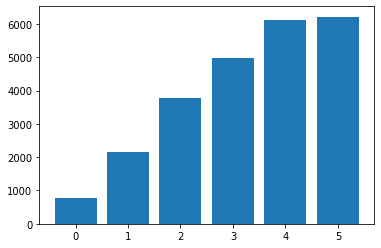

In [55]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
target_enc = LabelEncoder().fit_transform(target)
counter = Counter(target_enc)
for k,v in counter.items():
    per = v / len(target_enc) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

### Dividiendo el conjunto de datos en conjuntos de entrenamiento y pruebas

In [56]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=133)

Class=2, n=2504 (14.254%)
Class=4, n=4147 (23.607%)
Class=3, n=3327 (18.939%)
Class=5, n=4183 (23.812%)
Class=1, n=1406 (8.004%)
Class=0, n=2000 (11.385%)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


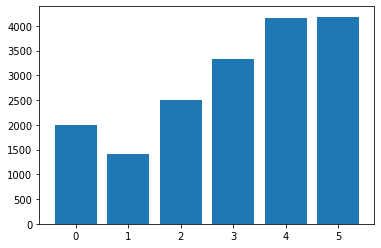

In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from collections import Counter
y_train= LabelEncoder().fit_transform(y_train)
strategy = {0:2000} #llega a 85.43 con solo 2000 en 0
oversample = SMOTE(sampling_strategy=strategy)
#oversample = SMOTE()-llega a 84.62
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

### Entrenando un árbol de decisión

In [58]:
# Método para creacion de modelos basados en arbol de desición
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score

d_train=lgb.Dataset(X_train, label=y_train)
#setting up the parameters
params={}
params['learning_rate']=0.15#85.13 con 0.1
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=20
params['num_class']=6 #no.of unique values in the target class not inclusive of the end value
params['seed']=100
#training the model
clf=lgb.train(params,d_train,100) #train the model on 100 epocs
#sin lgb
#dtc=DecisionTreeClassifier(random_state = 1, max_depth = 15)
#dtc = RandomForestClassifier(random_state = 1, max_depth = 15,n_estimators = 300)-el mejor hasta ahora con 64
#dtc=XGBClassifier(objective='multi:softmax')
#rfecv = RFECV(estimator=dtc, step=1, cv=StratifiedKFold(5), scoring='accuracy')
#rfecv.fit(X_train, y_train)

In [20]:
# Método para creacion de modelos basados en arbol de desición
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score
from sklearn.ensemble import ExtraTreesClassifier
dtc=ExtraTreesClassifier(max_depth=15,random_state=10)
rfecv = RFECV(estimator=dtc, step=1, cv=StratifiedKFold(3), scoring='accuracy')
rfecv.fit(X_train, y_train)

KeyboardInterrupt: ignored

### Haciendo predicciones en la muestra de prueba

In [59]:
#y_pred = rfecv.predict(X_test)
#prediction on the test dataset
y_pred=clf.predict(X_test)
y_pred = [np.argmax(line) for line in y_pred]

In [60]:
y_test= LabelEncoder().fit_transform(y_test)

### Analizando la calidad del modelo a través de la matriz de confusión

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(12, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

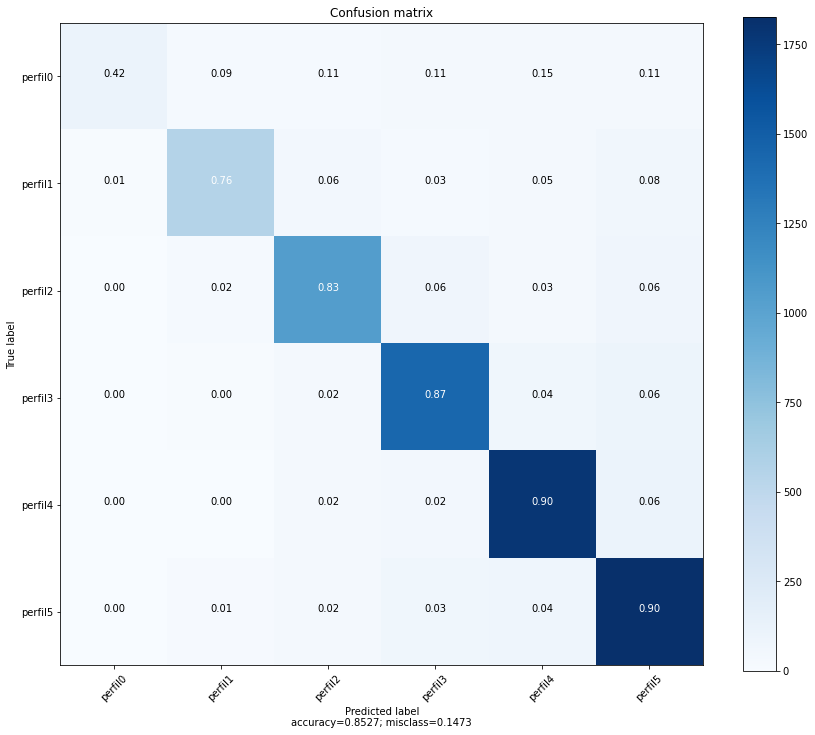

0.8058970244409268
0.8526515151515152
0.8496782344687452


In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
features.drop(features.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
dset = pd.DataFrame()
dset['attr'] = features.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
df_feature_importance = pd.DataFrame(rfecv.estimator_.feature_importances_, index=features.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance.plot(kind='barh')

<hr>

## Scoring de los datos necesarios para entregar la solución

Como entrega de su solución, esperamos los resultados clasificados del seguiente dataset llamado "to_be_scored.csv":

### Download la "Hoja de evaluación"

In [79]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-17 07:26:29--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/to_be_scored.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘to_be_scored.csv.2’

to_be_scored.csv.2      [ <=>                ]  85.58K  --.-KB/s    in 0.01s   

2020-09-17 07:26:29 (6.49 MB/s) - ‘to_be_scored.csv.2’ saved [87631]



,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes
995,25,M,35.0,Casado,Desempleados,Sector privado,ASUS,5.0,3.0,No,7.0,50.0,1.0,0.0,31.0
996,179,M,40.0,Soltero,Profesor,Sector privado,Iphone,10.0,NaN,Si,0.0,1.0,0.0,15.0,1.0
997,222,M,30.0,Casado,Profesor,Institucion publica,LG G2,5.0,3.0,Si,31.0,31.0,0.0,0.0,NaN
998,238,F,35.0,Casado,Servidor publico,Desempleados,Iphone 5,15.0,4.0,No,0.0,4.0,1.0,0.0,31.0
999,152,M,35.0,Soltero,Profesor,Institucion publica,Iphone,0.0,NaN,Si,30.0,7.0,15.0,15.0,15.0


# ¡Atención!

El dataframe ``to_be_scored`` en su "hoja de evaluación". Note que la columna "categoria" no existe en esta muetra, por lo que no puede ser utilizada para entrenar modelos supervisados

In [80]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 1000 non-null   int64  
 1   Genero                             963 non-null    object 
 2   Años                               980 non-null    float64
 3   Estado_civil                       976 non-null    object 
 4   Trabajo                            864 non-null    object 
 5   Sector                             983 non-null    object 
 6   Telefono                           927 non-null    object 
 7   Anos_usando_internet_banking       977 non-null    float64
 8   Anos_usando_banca_movil            945 non-null    float64
 9   Banca_movil_userfriendly           1000 non-null   object 
 10  Frecuencia_internet_banking_mes    911 non-null    float64
 11  Frecuencia_banca_movil_mes         940 non-null    float6

<hr>

# ¡Atención!

# Para poder aplicar su modelo y clasificar la hoja de evaluación, usted debe aplicar primero todas las transformaciones de columna que usted aplico en el dataset de entrenamiento.

# No remueva o adicione filas en la hoja de evaluación. 

# No altere el orden de las filas en la hoja de evaluación. 

# Al final, las 1000 entradas deben estar clasificadas, con los valores calculados en una columna llamada "target"

<hr>

In [81]:
df_to_be_scored['nulos']=np.where((df_to_be_scored['Genero'].isnull()==True)|
                                      (df_to_be_scored['Años'].isnull()==True)|
                                      (df_to_be_scored['Estado_civil'].isnull()==True)|
                                      (df_to_be_scored['Trabajo'].isnull()==True)|
                                      (df_to_be_scored['Sector'].isnull()==True)|
                                      (df_to_be_scored['Telefono'].isnull()==True)|
                                      (df_to_be_scored['Anos_usando_internet_banking'].isnull()==True)|
                                      (df_to_be_scored['Anos_usando_banca_movil'].isnull()==True)|
                                      (df_to_be_scored['Frecuencia_internet_banking_mes'].isnull()==True)|
                                      (df_to_be_scored['Frecuencia_banca_movil_mes'].isnull()==True)|
                                      (df_to_be_scored['Frecuencia_pagamentos_tarjeta_mes'].isnull()==True)|
                                      (df_to_be_scored['Frecuencia_tarjeta_virtual_mes'].isnull()==True)|
                                      (df_to_be_scored['Frecuencia_saldo_cuenta_mes'].isnull()==True)
                                      ,1,0)

In [82]:
df_to_be_scored['ayuda_perfil0']=(df_to_be_scored['Frecuencia_pagamentos_tarjeta_mes']+df_to_be_scored['Frecuencia_tarjeta_virtual_mes']+df_to_be_scored['Frecuencia_saldo_cuenta_mes']+media1_perfil0+media2_perfil0+media3_perfil0)
df_to_be_scored['ayuda_perfil1']=(df_to_be_scored['Frecuencia_internet_banking_mes']+df_to_be_scored['Frecuencia_banca_movil_mes']+media1_perfil1+media2_perfil1)
df_to_be_scored['frecuencias_servicios']=df_to_be_scored['Frecuencia_internet_banking_mes']*df_to_be_scored['Frecuencia_banca_movil_mes']

In [83]:
imputer.fit(X=df_to_be_scored)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=imputer.transform(
        X=df_to_be_scored
    ),
    columns=df_to_be_scored.columns
)

In [84]:
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['ID','Trabajo','Telefono'], inplace=False)

In [85]:
df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Banca_movil_userfriendly'])
df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_4, columns=['Genero'])
df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_4, columns=['Estado_civil'])
df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_4, columns=['Sector']) 
df_to_be_scored_4.tail()

,Años,Anos_usando_internet_banking,Anos_usando_banca_movil,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,nulos,ayuda_perfil0,ayuda_perfil1,frecuencias_servicios,Banca_movil_userfriendly_No,Banca_movil_userfriendly_Si,Genero_0,Genero_0,Genero_F,Genero_M,Estado_civil_0,Estado_civil_Casado,Estado_civil_Soltero,Sector_0,Sector_Desempleados,Sector_Institucion publica,Sector_Sector privado,Sector_Selfemployed
995,35.0,5.0,3.0,7.0,50.0,1.0,0.0,31.0,0,68.191267,116.951259,350.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
996,40.0,10.0,0.0,0.0,1.0,0.0,15.0,1.0,1,52.191267,60.951259,0.0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
997,30.0,5.0,3.0,31.0,31.0,0.0,0.0,0.0,1,0.000000,121.951259,961.0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
998,35.0,15.0,4.0,0.0,4.0,1.0,0.0,31.0,0,68.191267,63.951259,0.0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
999,35.0,0.0,0.0,30.0,7.0,15.0,15.0,15.0,1,81.191267,96.951259,210.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0


In [86]:
df_to_be_scored_4['internet_banking']=df_to_be_scored_4['Anos_usando_internet_banking']*df_to_be_scored_4['Frecuencia_internet_banking_mes']
df_to_be_scored_4['banca_movil']=df_to_be_scored_4['Anos_usando_banca_movil']*df_to_be_scored_4['Frecuencia_banca_movil_mes']
df_to_be_scored_4['frecuencia_usos_mes']=df_to_be_scored_4['Frecuencia_pagamentos_tarjeta_mes']*df_to_be_scored_4['Frecuencia_tarjeta_virtual_mes']*df_to_be_scored_4['Frecuencia_saldo_cuenta_mes']

En la celda de abajo, repetimos rapidamente los mismos pasos de pré-procesamiento usados en el ejemplo dado con árbol de decisión

<hr>

Puede verificar abajo que las columnas de la hoja de evaluación son identicas a las usadas para entrenar el modelo:

In [87]:
df_to_be_scored_4=df_to_be_scored_4[
    [
        'nulos','ayuda_perfil0','ayuda_perfil1','frecuencia_usos_mes', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'internet_banking', 'banca_movil','Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
      'Frecuencia_pagamentos_tarjeta_mes','Frecuencia_saldo_cuenta_mes','frecuencias_servicios'
    ]
]

In [88]:
df_to_be_scored_4.columns

Index(['nulos', 'ayuda_perfil0', 'ayuda_perfil1', 'frecuencia_usos_mes',
       'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'internet_banking', 'banca_movil', 'Frecuencia_internet_banking_mes',
       'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes',
       'Frecuencia_saldo_cuenta_mes', 'frecuencias_servicios'],
      dtype='object')

# Atención

Para todas las columnas que no existiren en "df_to_be_scored", usted puede usar la tecnica de abajo para adicionarla:

In [78]:
#df_to_be_scored_4['Banca_movil_userfriendly_No'] = 0

In [89]:
y_pred = clf.predict(df_to_be_scored_4)
y_pred = [np.argmax(line) for line in y_pred]
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

,nulos,ayuda_perfil0,ayuda_perfil1,frecuencia_usos_mes,Anos_usando_internet_banking,Anos_usando_banca_movil,internet_banking,banca_movil,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_saldo_cuenta_mes,frecuencias_servicios,TARGET
995,0,68.191267,116.951259,0.0,5.0,3.0,35.0,150.0,7.0,50.0,1.0,31.0,350.0,2
996,1,52.191267,60.951259,0.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5
997,1,0.000000,121.951259,0.0,5.0,3.0,155.0,93.0,31.0,31.0,0.0,0.0,961.0,5
998,0,68.191267,63.951259,0.0,15.0,4.0,0.0,16.0,0.0,4.0,1.0,31.0,0.0,3
999,1,81.191267,96.951259,3375.0,0.0,0.0,0.0,0.0,30.0,7.0,15.0,15.0,210.0,5


In [95]:
for i in range(df_to_be_scored_4.shape[0]):
  if df_to_be_scored_4['TARGET'][i]==0:
    df_to_be_scored_4['TARGET'][i]="Perfil_0"
  elif df_to_be_scored_4['TARGET'][i]==1:
    df_to_be_scored_4['TARGET'][i]="Perfil_1"
  elif df_to_be_scored_4['TARGET'][i]==2:
    df_to_be_scored_4['TARGET'][i]="Perfil_2"
  elif df_to_be_scored_4['TARGET'][i]==3:
    df_to_be_scored_4['TARGET'][i]="Perfil_3"
  elif df_to_be_scored_4['TARGET'][i]==4:
    df_to_be_scored_4['TARGET'][i]="Perfil_4"
  else:
    df_to_be_scored_4['TARGET'][i]="Perfil_5"


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_p

### Guardando la hoja de evaluacion como un archivo .csv para ser enviado
**SI YA TIENE UN DATA ASSET CON EL NOMBRE results.csv EN ESTE PROYECTO O EN OTRO PROYECTO DE WATSON STUDIO DEBE BORRAR EL ARCHIVO ANTES DE CORRER LA SIGUIENTE CELDA O TENDRA EL ERROR: _RuntimeError: File 'results.csv' already exists in storage._**

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [98]:
df_to_be_scored_4.to_csv('/content/drive/My Drive/Colab Notebooks/desafio 7/results.csv')

In [ ]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

# ATENCIÓN

# La ejecución de la celda anterior creará un nuevo "data asset" en su proyecto de Watson Studio. Deberá descargar este archivo junto con este cuaderno y crear un archivo zip con results.csv y notebook.ipynb para enviarlo. (los archivos deben tener este nombre)

<hr>

## ¡Felicitaciones!
Si ya está satisfecho con su solución, vaya a la página siguiente y envíe los archivos necesarios para su envío.

# https://bancoppel.maratona.dev
